In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from PIL import Image

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time



In [2]:
china = load_sample_image("china.jpg")
china.shape

(427, 640, 3)

In [57]:
# google = Image.open("google.png")
# print(np.asarray(google).shape)
# google = np.asarray(google)[:, :, :-1]
# print(np.asarray(google).shape)

In [58]:
# hollow = Image.open("Hollow_-_Logotipo-03.png")
# hollow = np.asarray(hollow)[:, :, :-1]

In [3]:
X = china.reshape(-1, 3)
# X = google.reshape(-1, 3)
# X = hollow.reshape(-1, 3)

In [4]:
X.min(), X.mean(), X.max()

(0, 143.70222726385637, 255)

In [5]:
X = X.astype("float32") / 255
X.min(), X.mean(), X.max()

(0.0, 0.56353813, 1.0)

In [6]:
kmeans = KMeans(n_clusters=5)
predictions = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_


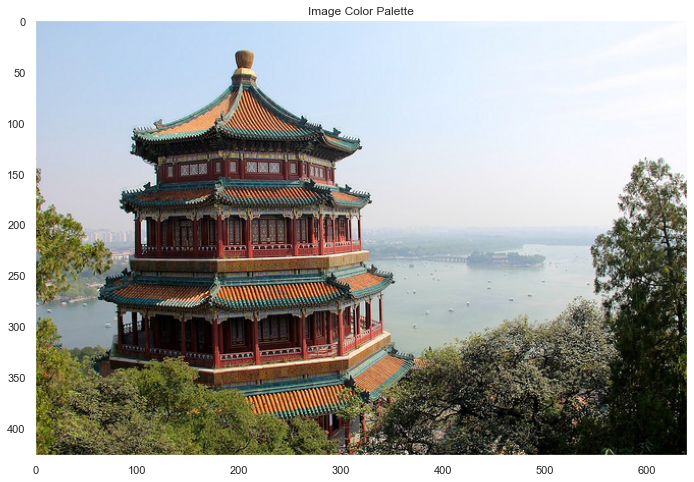

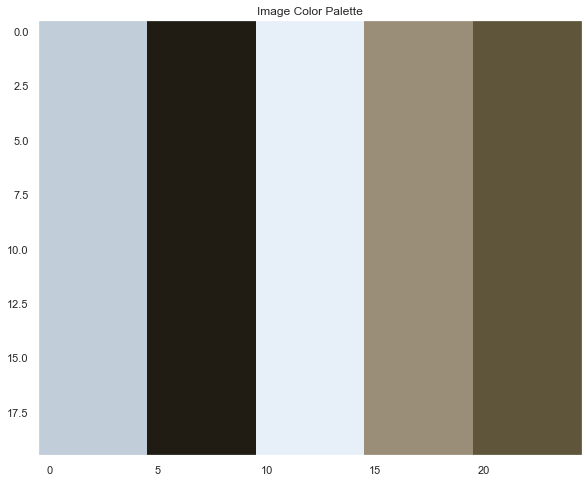

In [7]:
plt.figure(figsize=(14,8))
plt.imshow(china)
plt.title("Image Color Palette")
plt.grid()

plt.figure(figsize=(14,8))
plt.imshow(centers[np.concatenate([[i] * 100 for i in range(len(centers))]).reshape((-1,20)).T])
plt.title("Image Color Palette")
plt.grid()

# test = centers[np.concatenate([[i] * 100 for i in range(len(centers))]).reshape((-1,20)).T]
# test[:, :, :] *= 255 * np.ones((test.shape[0], test.shape[1], test.shape[2]))

In [8]:
rgb = centers*  255
rgb = rgb.astype(np.int64)
rgb



array([[193, 206, 217],
       [ 32,  28,  20],
       [231, 239, 248],
       [154, 142, 120],
       [ 94,  85,  59]], dtype=int64)

Output paleta como .txt RGB para atualizar no website

In [9]:
names = ["primary", "secondary"]
def generate_rgb_text(filename, names, palette):
    if len(names) != palette.shape[0]:
        raise ValueError
    with open(filename, "w") as file:
        for i, name in enumerate(names):
            color = name + " rgb("
            color += str(palette[i, :])
            color += ") \n"
            file.write(color)

generate_rgb_text("rgbTest.txt", names, rgb[:2, :])




Fazer visualização para k-clusters usando HSV

In [28]:
import colorsys 

def convert_rgb_to_hsv(rgb_palette):
    hsv = np.zeros(rgb_palette.shape)
    for i in range(rgb_palette.shape[0]):
        hsv[i, :] = colorsys.rgb_to_hsv(rgb_palette[i, 0],
                                    rgb_palette[i, 1],
                                    rgb_palette[i, 2])
    return hsv

def convert_hsv_to_rgb(hsv_palette):
    rgb = np.zeros(hsv_palette.shape)
    for i in range(hsv_palette.shape[0]):
        rgb[i, :] = colorsys.hsv_to_rgb(hsv_palette[i, 0],
                                    hsv_palette[i, 1],
                                    hsv_palette[i, 2])
    return rgb

In [11]:
# converter imagem original para HSV
Xhsv = convert_rgb_to_hsv(X)
# manter apenas hue
Xhue = Xhsv[:, 0]

print(Xhue[:10])
    


[0.5877193  0.5877193  0.5877193  0.5877193  0.5877193  0.5877193
 0.5877193  0.5877193  0.58474576 0.58474576]


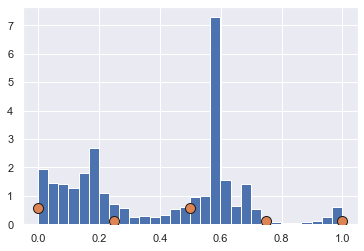

In [27]:
# fazer histograma dos valores de hue presentes na imagem
fig = plt.figure()
ax = fig.add_subplot()
histogram = ax.hist(Xhue, bins=30, density=True, zorder=4)

# converter centros dos kmeans para HSV
centersHsv = convert_rgb_to_hsv(rgb)
# manter apenas Hue e comparar no histograma
centersHue = centersHsv[:, 0]
ax.plot(np.linspace(0, 1, centersHue.size), centersHue,
        ls='None', marker='o', ms=10.0, mec='k', zorder=5)

# mapear Hue no fundo
hue_colormap = np.zeros((100, 100, 3))
hue_colormap[:, :, 1:] = 0.5
hue_colormap[:, :, 0] = np.linspace(0, 1, 100)
ax.imshow(hue_colormap)